<a href="https://colab.research.google.com/github/Ivette-GR/banco-caja/blob/main/proyecto3rr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-cloud-bigquery
!pip install pandas
from google.cloud import bigquery
from google.colab import auth

auth.authenticate_user()

# Especifica el ID del proyecto
project_id = 'riesgo-relativo'
client = bigquery.Client(project=project_id)

# Especifica la consulta SQL para obtener los datos
query = 'SELECT * FROM `riesgo-relativo.riesgorelativo.dummy_score`'

# Ejecuta la consulta y almacena los resultados en un DataFrame de Pandas
df = client.query(query).to_dataframe()

# Imprime el DataFrame
print(df.head())

   user_id  default_flag  dummy_age  dummy_debt_ratio  dummy_delayed_payment  \
0     5671             0          1                 1                      2   
1    20579             0          1                 1                      2   
2    23544             0          1                 1                      2   
3    19936             0          1                 1                      2   
4    26020             1          1                 1                      2   

   dummy_r_delayed  dummy_last_month_salary  dummy_loans  dummy_more_90_days  \
0                1                        1            1                   3   
1                1                        1            1                   3   
2                1                        1            1                   3   
3                1                        1            1                   3   
4                1                        1            1                   3   

   dummy_r_90_days  dummy_number_depen

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Supongamos que tienes columnas llamadas 'y_real' y 'y_pred' en tu DataFrame DF
y_real = df['default_flag']
y_pred = df['dummy_age']

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_real, y_pred)

# Mostrar la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(conf_matrix_df)

          Predicted 0  Predicted 1
Actual 0        17714        17409
Actual 1          163          469


In [ ]:
pip install seaborn matplotlib scikit-learn pandas

          Predicted 0  Predicted 1
Actual 0        17714        17409
Actual 1          163          469


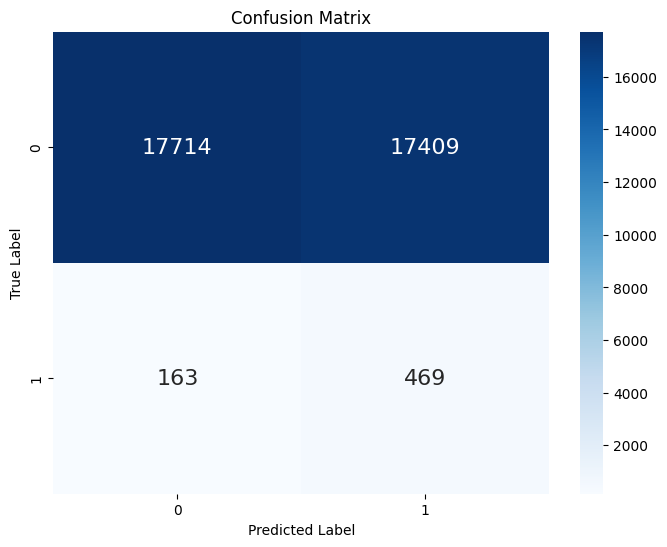

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

# Supongamos que tienes columnas llamadas 'y_real' y 'y_pred' en tu DataFrame DF
y_real = df['default_flag']
y_pred = df['dummy_age']

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_real, y_pred)

# Mostrar la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(conf_matrix_df)

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

          Predicted 0  Predicted 1
Actual 0        29443         5680
Actual 1           28          604


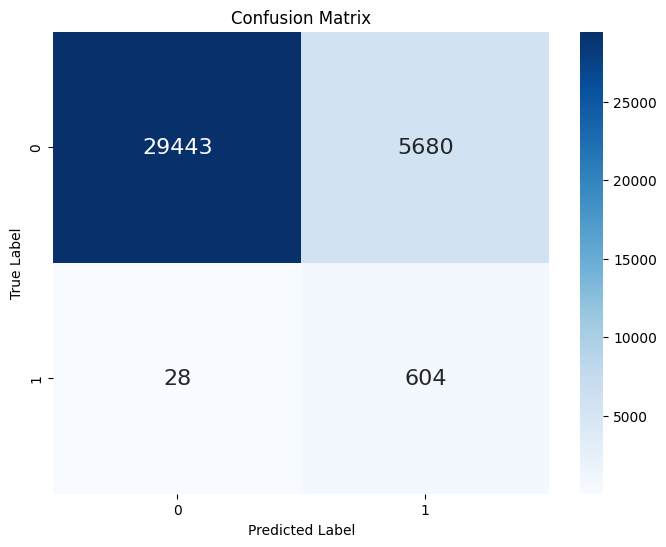

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'default_flag' es tu etiqueta real
y_real = df['default_flag']

# Supongamos que 'dummy_age', 'dummy_debt_ratio', etc. son tus etiquetas predichas
y_pred = df[['dummy_score']]

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_real, y_pred.any(axis=1))  # Usa .any(axis=1) para obtener cualquier valor True en las columnas

# Mostrar la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(conf_matrix_df)

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
expected_columns = ['dummy_age', 'dummy_debt_ratio', 'dummy_delayed_payment', 'dummy_last_month_salary',
                    'dummy_loan', 'dummy_more_90_days', 'dummy_number_dependent', 'dummy_secured_lines']

missing_columns = [col for col in expected_columns if col not in df.columns]

if missing_columns:
    print(f"Las siguientes columnas están ausentes en el DataFrame: {missing_columns}")

Las siguientes columnas están ausentes en el DataFrame: ['dummy_loan', 'dummy_number_dependent']


In [ ]:
mediana = df['score'].median()

# Imprimir la mediana
print("La mediana es:", mediana)

La mediana es: 4.0


In [ ]:
df.describe()

,user_id,default_flag,dummy_age,dummy_debt_ratio,dummy_delayed_payment,dummy_r_delayed,dummy_last_month_salary,dummy_loans,dummy_more_90_days,dummy_r_90_days,dummy_number_dependet,dummy_secured_lines,dummy_r_scured,score,dummy_score
count,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0
mean,18004.10681,0.017676,0.500014,0.499986,0.499958,0.249979,0.500014,0.500014,0.749937,0.249979,0.499986,0.499958,0.249979,4.249867,0.175752
std,10394.598969,0.131772,0.500007,0.500007,0.866013,0.433007,0.500007,0.500007,1.29902,0.433007,0.500007,0.866013,0.433007,2.428664,0.380614
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,9004.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
50%,18005.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
75%,27009.5,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0
max,36000.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,12.0,1.0


In [ ]:
pip install scikit-learn

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.84      0.91     35123
         1.0       0.10      0.96      0.17       632

    accuracy                           0.84     35755
   macro avg       0.55      0.90      0.54     35755
weighted avg       0.98      0.84      0.90     35755

F1 Score: 0.17466743782533253
Specificity: 0.8382826068388236


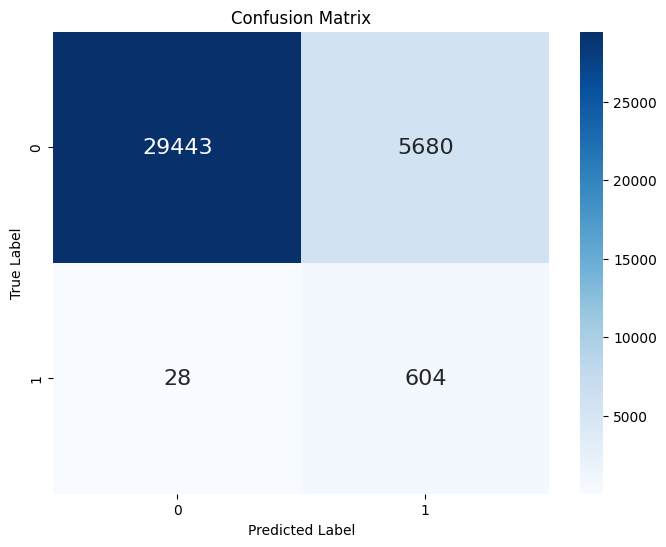

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Supongamos que 'default_flag' es tu etiqueta real
y_real = df['default_flag']

# Supongamos que 'dummy_age', 'dummy_debt_ratio', etc. son tus etiquetas predichas
y_pred = df[['dummy_score']]

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_real, y_pred.any(axis=1))

# Calcular métricas
classification_rep = classification_report(y_real, y_pred.any(axis=1))
f1 = f1_score(y_real, y_pred.any(axis=1))
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Mostrar métricas
print("Classification Report:\n", classification_rep)
print("F1 Score:", f1)
print("Specificity:", specificity)

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

En la clase 2 que serian los 1 acertamos 607 veces y fallamos 25 veces tenemos un recall (sensibilidad) de .96. aumenta los falsos positvos por lo que catalogo la prueba como 5675 como negativos, siendo positivos y 25 dijo la prueba que eran positivos pero realmente son negativos acuracy (.84) que es exactitud

In [ ]:
df['default_flag'].astype(int)

0        0
1        0
2        0
3        0
4        1
        ..
35750    1
35751    0
35752    1
35753    1
35754    1
Name: default_flag, Length: 35755, dtype: int64

In [ ]:
x=df[['dummy_score']]
x

,dummy_score
0,1
1,1
2,1
3,1
4,1
...,...
35750,1
35751,1
35752,1
35753,1


In [ ]:
df['default_flag'].astype(int)


0        0
1        0
2        0
3        0
4        1
        ..
35750    1
35751    0
35752    1
35753    1
35754    1
Name: default_flag, Length: 35755, dtype: int64

In [ ]:
y=df[['default_flag']]
y

,default_flag
0,0
1,0
2,0
3,0
4,1
...,...
35750,1
35751,0
35752,1
35753,1


In [ ]:
#separar data de entrenamiento con data de validacion
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=.30, random_state=42)
x_train

,dummy_score
321,0
26738,0
30765,1
10275,0
4291,0
...,...
16850,0
6265,0
11284,0
860,0


In [ ]:
import timeit
import warnings

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Entrenamiento del modelo
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [ ]:
# Predicciones
y_pred = logistic_regression.predict(x_test)

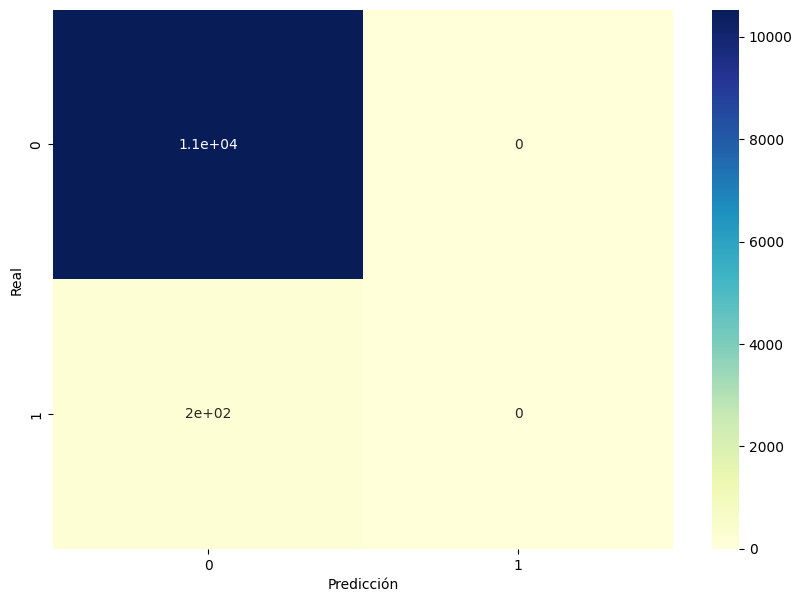

Tasa de aciertos: 0.981355458189615

Matriz de confusión:
 [[10527     0]
 [  200     0]]

Precisión, Recall y F1-score:
 {'Class 0': {'precision': 0.981355458189615, 'recall': 1.0, 'f1-score': 0.9905900065869955, 'support': 10527}, 'Class 1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 200}, 'accuracy': 0.981355458189615, 'macro avg': {'precision': 0.4906777290948075, 'recall': 0.5, 'f1-score': 0.49529500329349774, 'support': 10727}, 'weighted avg': {'precision': 0.9630585353185491, 'recall': 0.981355458189615, 'f1-score': 0.9721209097922346, 'support': 10727}}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# entrena tu modelo usando el conjunto de datos de entrenamiento
# y_pred = modelo.predict(X_test)

# calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Dibuja la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.show()

# Evaluación del modelo
print("Tasa de aciertos:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

# Calcular y mostrar la precisión, el recall y el F1 score
print("\nPrecisión, Recall y F1-score:\n", classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True))

In [ ]:
import pandas as pd
from copy import copy

log_default=copy(df)

In [ ]:
x=log_default[['dummy_age', 'dummy_debt_ratio', 'dummy_delayed_payment','dummy_last_month_salary', 'dummy_loans', 'dummy_more_90_days', 'dummy_number_dependet', 'dummy_secured_lines']]

In [ ]:
y=log_default[['default_flag']]
y

,default_flag
0,0
1,0
2,0
3,0
4,1
...,...
35750,1
35751,0
35752,1
35753,1


In [ ]:
import timeit
import warnings

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Entrenamiento del modelo
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [ ]:
# Predicciones
y_pred = logistic_regression.predict(x_test)

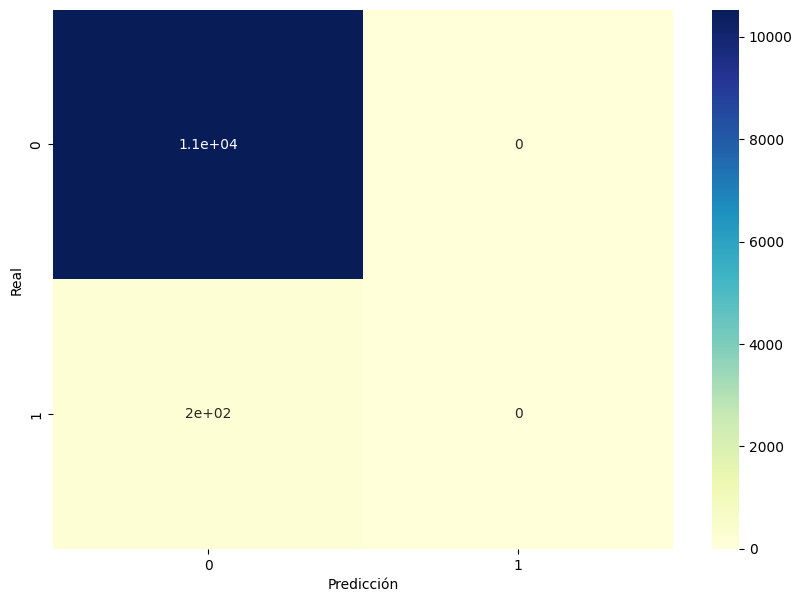

Tasa de aciertos: 0.981355458189615

Matriz de confusión:
 [[10527     0]
 [  200     0]]

Precisión, Recall y F1-score:
 {'Class 0': {'precision': 0.981355458189615, 'recall': 1.0, 'f1-score': 0.9905900065869955, 'support': 10527}, 'Class 1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 200}, 'accuracy': 0.981355458189615, 'macro avg': {'precision': 0.4906777290948075, 'recall': 0.5, 'f1-score': 0.49529500329349774, 'support': 10727}, 'weighted avg': {'precision': 0.9630585353185491, 'recall': 0.981355458189615, 'f1-score': 0.9721209097922346, 'support': 10727}}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# entrena tu modelo usando el conjunto de datos de entrenamiento
# y_pred = modelo.predict(X_test)

# calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Dibuja la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.show()

# Evaluación del modelo
print("Tasa de aciertos:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

# Calcular y mostrar la precisión, el recall y el F1 score
print("\nPrecisión, Recall y F1-score:\n", classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True))

In [ ]:
import pandas as pd
from copy import copy

log_m=copy(df)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score

# Supongo que 'log_m' es tu DataFrame con las variables 'dummy_age', 'dummy_debt_ratio', etc.

# Tu código original
X = log_m[['dummy_age', 'dummy_debt_ratio', 'dummy_delayed_payment', 'dummy_last_month_salary', 'dummy_loans', 'dummy_more_90_days', 'dummy_number_dependet', 'dummy_secured_lines']]
y = log_m['default_flag']

# Crear y dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística con ponderación de clases
logreg = LogisticRegression(class_weight='balanced', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
logreg.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = logreg.predict(X_test)

# Calcular y mostrar las métricas de desempeño
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Imprimir las métricas
print('Matriz de confusión:')
print(conf_matrix)
print('\nTasa de aciertos:', accuracy)
print('F1 Score:', f1)
print('Sensibilidad (Recall):', sensitivity)
print('Especificidad:', specificity)

Matriz de confusión:
[[6225  788]
 [   7  131]]

Tasa de aciertos: 0.888826737519228
F1 Score: 0.2478713339640492
Sensibilidad (Recall): 0.9492753623188406
Especificidad: 0.8876372451162128


aqui aplique class_weight='balanced ya que mis clases de default flag se encuentran desproporcionadas

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.84      0.91      7013
         1.0       0.10      0.94      0.19       138

    accuracy                           0.84      7151
   macro avg       0.55      0.89      0.55      7151
weighted avg       0.98      0.84      0.90      7151

F1 Score: 0.18505338078291814
Specificity: 0.8378725224582917


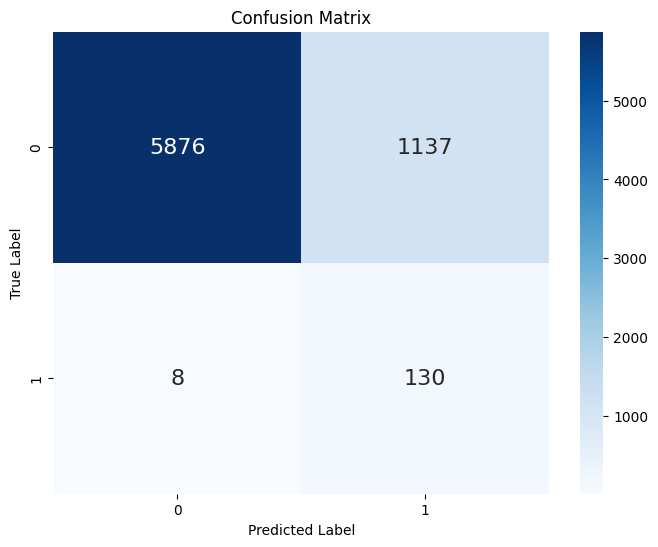

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'default_flag' es tu etiqueta real
y_real = df['default_flag']

# Supongamos que 'dummy_age', 'dummy_debt_ratio', etc. son tus características
X = df[['dummy_score']]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_real, test_size=0.2, random_state=42)

# Crear un clasificador RandomForest con class_weight='balanced'
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = clf.predict(X_test)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular métricas
classification_rep = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Mostrar métricas
print("Classification Report:\n", classification_rep)
print("F1 Score:", f1)
print("Specificity:", specificity)

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score

# Supongo que 'log_m' es tu DataFrame con las variables 'dummy_age', 'dummy_debt_ratio', etc.

# Tu código original
X = log_m[['dummy_age', 'dummy_debt_ratio', 'dummy_delayed_payment', 'dummy_last_month_salary', 'dummy_loans', 'dummy_more_90_days', 'dummy_number_dependet', 'dummy_secured_lines']]
y = log_m['default_flag']

# Crear y dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística con ponderación de clases
logreg = LogisticRegression(class_weight='balanced', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
logreg.fit(X_train, y_train)

# Imprimir los coeficientes del modelo
coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]

print('Coeficientes del modelo:')
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

print('\nIntercepto:', intercept)

# Realizar predicciones sobre el conjunto de prueba
y_pred = logreg.predict(X_test)

# Calcular y mostrar las métricas de desempeño
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Imprimir las métricas
print('\nMatriz de confusión:')
print(conf_matrix)
print('\nTasa de aciertos:', accuracy)
print('F1 Score:', f1)
print('Sensibilidad (Recall):', sensitivity)
print('Especificidad:', specificity)

Coeficientes del modelo:
dummy_age: 0.7115255752493868
dummy_debt_ratio: 0.3916368847442023
dummy_delayed_payment: 1.7395936653001443
dummy_last_month_salary: 0.29633503530222977
dummy_loans: -0.12405660765713769
dummy_more_90_days: 1.3019409294960314
dummy_number_dependet: -0.03934087803484885
dummy_secured_lines: 1.8329276289648913

Intercepto: -7.873027796249958

Matriz de confusión:
[[6225  788]
 [   7  131]]

Tasa de aciertos: 0.888826737519228
F1 Score: 0.2478713339640492
Sensibilidad (Recall): 0.9492753623188406
Especificidad: 0.8876372451162128


Coeficientes del modelo:
dummy_age: 0.7100873226384599
dummy_debt_ratio: 0.3905049999289382
dummy_r_delayed: 3.458087483002339
dummy_last_month_salary: 0.29594078635272403
dummy_loans: -0.12015891112594816
dummy_r_90_days: 3.8804516633441097
dummy_number_dependet: -0.03915265471489199
dummy_r_scured: 3.6426485838499683

Intercepto: -7.826374011891667

Matriz de confusión:
[[6225  788]
 [   7  131]]

Tasa de aciertos: 0.888826737519228
F1 Score: 0.2478713339640492
Sensibilidad (Recall): 0.9492753623188406
Especificidad: 0.8876372451162128


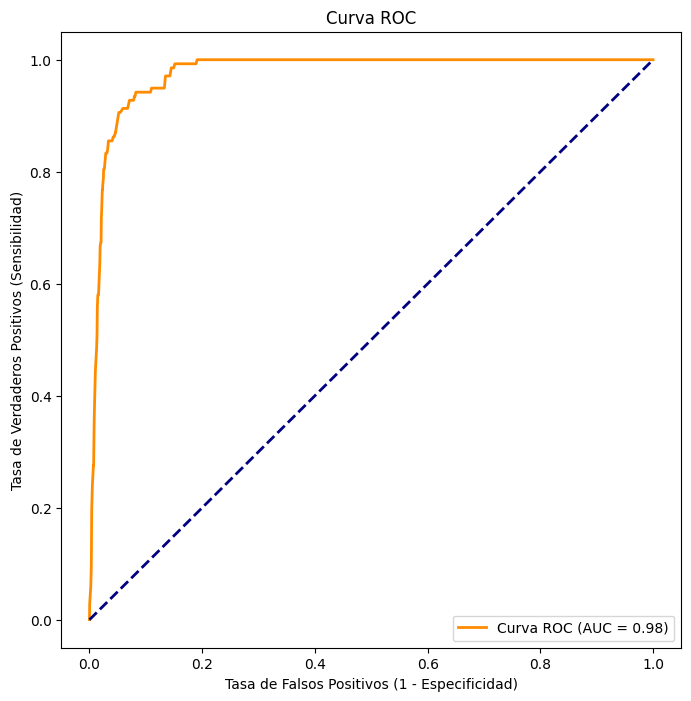

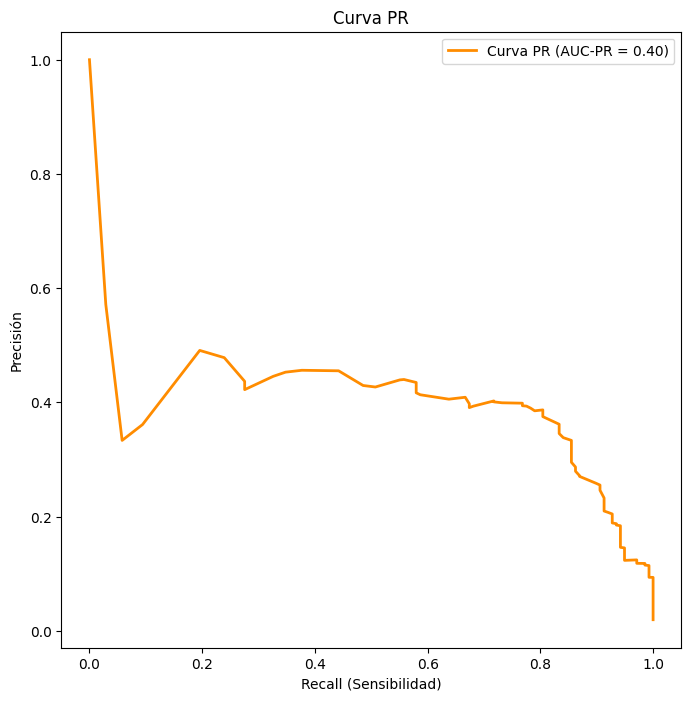

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Supongo que 'log_m' es tu DataFrame con las variables 'dummy_age', 'dummy_debt_ratio', etc.

# Tu código original
X = log_m[['dummy_age', 'dummy_debt_ratio', 'dummy_r_delayed', 'dummy_last_month_salary', 'dummy_loans', 'dummy_r_90_days', 'dummy_number_dependet', 'dummy_r_scured']]
y = log_m['default_flag']

# Crear y dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística con ponderación de clases
logreg = LogisticRegression(class_weight='balanced', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
logreg.fit(X_train, y_train)

# Imprimir los coeficientes del modelo
coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]

print('Coeficientes del modelo:')
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

print('\nIntercepto:', intercept)

# Realizar predicciones sobre el conjunto de prueba
y_pred = logreg.predict(X_test)

# Calcular y mostrar las métricas de desempeño
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Imprimir las métricas
print('\nMatriz de confusión:')
print(conf_matrix)
print('\nTasa de aciertos:', accuracy)
print('F1 Score:', f1)
print('Sensibilidad (Recall):', sensitivity)
print('Especificidad:', specificity)

# Calcular la probabilidad de predicción en lugar de las clases
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calcular la curva PR y el área bajo la curva PR (AUC-PR)
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

# Plotear la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Plotear la curva PR
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Curva PR (AUC-PR = {pr_auc:.2f})')
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precisión')
plt.title('Curva PR')
plt.legend(loc='upper right')
plt.show()

en esta matriz tambien se uso class_weight por el desbalance de clase que existe en default flag hay que quitarel desvalanceo por que estamos aplicando el class en regresiòn logistica y estom es para comprobarlo

In [ ]:
!pip install google-cloud-bigquery
!pip install pandas
from google.cloud import bigquery
from google.colab import auth

auth.authenticate_user()

# Especifica el ID del proyecto
project_id = 'riesgo-relativo'
client = bigquery.Client(project=project_id)

# Especifica la consulta SQL para obtener los datos
query = 'SELECT * FROM `riesgo-relativo.riesgorelativo.rr_total_loans`'

# Ejecuta la consulta y almacena los resultados en un DataFrame de Pandas
rr_tl = client.query(query).to_dataframe()

# Imprime el DataFrame
print(rr_tl.head())

   cuartil_total_loans  ratio_default_1  ratio_default_0  \
0                    2         0.253165         0.249950   
1                    3         0.159810         0.251630   
2                    1         0.417722         0.246989   
3                    4         0.169304         0.251431   

   ratio_default_1_to_0  ratio_default_0_to_1  
0              1.012860              0.987303  
1              0.635100              1.574556  
2              1.691255              0.591277  
3              0.673362              1.485086  


In [ ]:
!pip install google-cloud-bigquery
!pip install pandas
from google.cloud import bigquery
from google.colab import auth

auth.authenticate_user()

# Especifica el ID del proyecto
project_id = 'riesgo-relativo'
client = bigquery.Client(project=project_id)

# Especifica la consulta SQL para obtener los datos
query = 'SELECT * FROM `riesgo-relativo.riesgorelativo.tabla_general`'

# Ejecuta la consulta y almacena los resultados en un DataFrame de Pandas
tg = client.query(query).to_dataframe()

# Imprime el DataFrame
print(tg.head())

   user_id  age sex  last_month_salary  number_dependent  loan_other  \
0     8870   21   F             5200.0                 0           1   
1    18876   21   F             5200.0                 0           0   
2    28075   21   M             5200.0                 0           1   
3    28122   21   M             5200.0                 0           0   
4    33474   21   M             5200.0                 0           1   

   loan_real_state  total_loans  more_90_days_overdue  \
0                0            1                     0   
1                0            0                     0   
2                0            1                     0   
3                0            0                     0   
4                0            1                     0   

   number_times_delayed_payment_loan_30_59_days  ...  \
0                                             0  ...   
1                                             0  ...   
2                                             0  ...   


In [ ]:
pip install pandas matplotlib

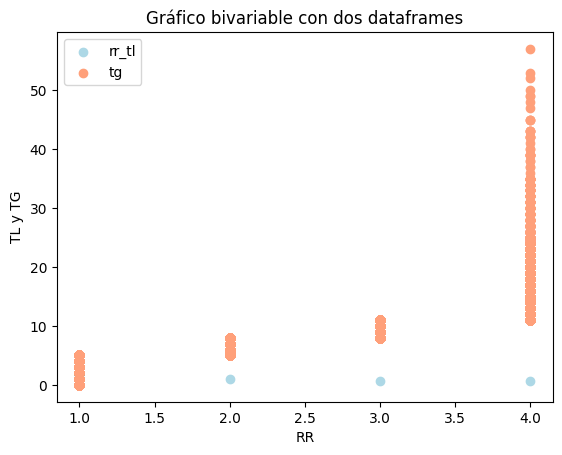

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.scatter(rr_tl['cuartil_total_loans'], rr_tl['ratio_default_1_to_0'], color='#ADD8E6', label='rr_tl')
plt.scatter(tg['cuartil_total_loans'], tg['total_loans'], color='#FFA07A', label='tg')

# Añadir título y etiquetas a los ejes
plt.title('Gráfico bivariable con dos dataframes')
plt.xlabel('RR')
plt.ylabel('TL y TG')

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
!pip install google-cloud-bigquery
!pip install pandas
from google.cloud import bigquery
from google.colab import auth

auth.authenticate_user()

# Especifica el ID del proyecto
project_id = 'riesgo-relativo'
client = bigquery.Client(project=project_id)

# Especifica la consulta SQL para obtener los datos
query = 'SELECT * FROM `riesgo-relativo.riesgorelativo.rr_last_month_salary`'

# Ejecuta la consulta y almacena los resultados en un DataFrame de Pandas
rr_ls = client.query(query).to_dataframe()

# Imprime el DataFrame
print(rr_ls.head())

   cuartil_last_month_salary  ratio_default_1  ratio_default_0  \
0                          1         0.390823         0.247473   
1                          2         0.286392         0.249352   
2                          3         0.208861         0.250747   
3                          4         0.113924         0.252427   

   ratio_default_1_to_0  ratio_default_0_to_1  
0              1.579253              0.633211  
1              1.148545              0.870667  
2              0.832953              1.200548  
3              0.451315              2.215750  


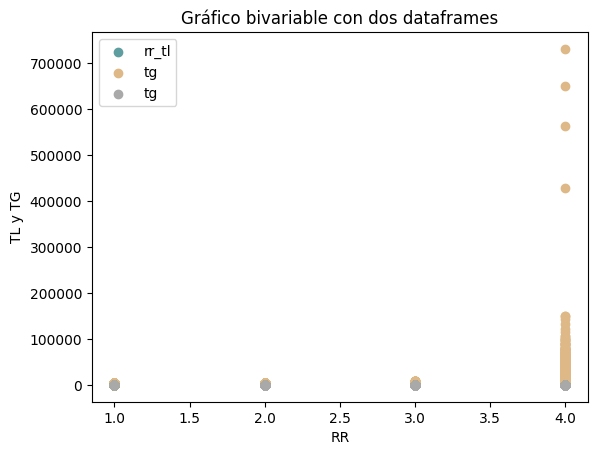

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.scatter(rr_ls['cuartil_last_month_salary'], rr_ls['ratio_default_1_to_0'], color='#5F9EA0', label='rr_tl')
plt.scatter(tg['cuartil_last_month_salary'], tg['last_month_salary'], color='#DEB887', label='tg')
plt.scatter(tg['cuartil_last_month_salary'], tg['age'], color='#A9A9A9', label='tg')

# Añadir título y etiquetas a los ejes
plt.title('Gráfico bivariable con dos dataframes')
plt.xlabel('RR')
plt.ylabel('TL y TG')

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
!pip install google-cloud-bigquery
!pip install pandas
from google.cloud import bigquery
from google.colab import auth

auth.authenticate_user()

# Especifica el ID del proyecto
project_id = 'riesgo-relativo'
client = bigquery.Client(project=project_id)

# Especifica la consulta SQL para obtener los datos
query = 'SELECT * FROM `riesgo-relativo.riesgorelativo.dummy_score`'

# Ejecuta la consulta y almacena los resultados en un DataFrame de Pandas
dummy = client.query(query).to_dataframe()

# Imprime el DataFrame
print(dummy.head())

   user_id  default_flag  dummy_age  dummy_debt_ratio  dummy_delayed_payment  \
0     5671             0          1                 1                      2   
1    20579             0          1                 1                      2   
2    23544             0          1                 1                      2   
3    19936             0          1                 1                      2   
4    26020             1          1                 1                      2   

   dummy_r_delayed  dummy_last_month_salary  dummy_loans  dummy_more_90_days  \
0                1                        1            1                   3   
1                1                        1            1                   3   
2                1                        1            1                   3   
3                1                        1            1                   3   
4                1                        1            1                   3   

   dummy_r_90_days  dummy_number_depen

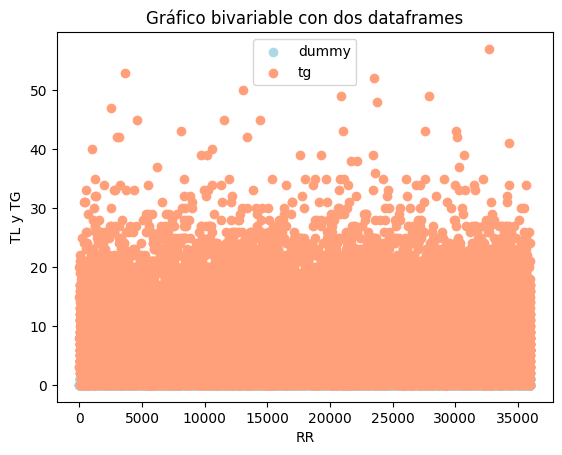

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.scatter(dummy['user_id'], dummy['dummy_score'], color='#ADD8E6', label='dummy')
plt.scatter(tg['user_id'], tg['total_loans'], color='#FFA07A', label='tg')

# Añadir título y etiquetas a los ejes
plt.title('Gráfico bivariable con dos dataframes')
plt.xlabel('RR')
plt.ylabel('TL y TG')

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
